## Initial setup
This analysis using ema is based on the work of Enayat A. Moallemi created on 22 May 2018 at the Fraunhofer ISI, Karlsruhe. In that instance, the analysis was done for the MATISSE model.

In [26]:

'''
Based on Enayat A. Moallemi version from May 2018

edited by Angela M. Rojas A. <angelara@student.unimelb.edu.au>

Created on 18 December 2019

'''
import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments')

#from ema_workbench.analysis.plotting_util import BOXPLOT, KDE, VIOLIN
from EMAworkbench.ema_workbench.analysis.plotting import envelopes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from EMAworkbench.ema_workbench.analysis import prim
#import pareto
import os
import glob
import numpy as np
import pandas as pd
import os
import glob



## Load the results

In [27]:
from EMAworkbench.ema_workbench import load_results

results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\simulationData\gr4sp_2020-Jul-11-SOBOL.tar.gz')


In [28]:
experiments, outcomes = results

# Create a temporary copy of dictionary, with Outcomes Year
outcomesYear = dict(outcomes)

keysToRemove = [] 
# Iterate over the temporary dictionary and delete corresponding key from original dictionary
for (key, value) in outcomesYear.items() :
    if 'Month' in key:
        keysToRemove.append(key)
        
for k in keysToRemove:        
    del outcomesYear[k]   
    
        

In [29]:
experiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49152 entries, 0 to 49151
Data columns (total 26 columns):
annualCpi                         49152 non-null float64
annualInflation                   49152 non-null float64
capacityFactorChangeBrownCoal     49152 non-null float64
capacityFactorChangeWater         49152 non-null float64
consumption                       49152 non-null float64
energyEfficiency                  49152 non-null float64
generationRolloutPeriod           49152 non-null float64
generatorRetirement               49152 non-null float64
includePublicallyAnnouncedGen     49152 non-null float64
learningCurve                     49152 non-null float64
nonScheduleGenSpotMarket          49152 non-null float64
nonScheduleMinCapMarketGen        49152 non-null float64
priceChangePercentageBrownCoal    49152 non-null float64
priceChangePercentageOcgt         49152 non-null float64
priceChangePercentageWater        49152 non-null float64
priceChangePercentageWind         49

In [30]:
experiments.describe()

,annualCpi,annualInflation,capacityFactorChangeBrownCoal,capacityFactorChangeWater,consumption,energyEfficiency,generationRolloutPeriod,generatorRetirement,includePublicallyAnnouncedGen,learningCurve,...,priceChangePercentageOcgt,priceChangePercentageWater,priceChangePercentageWind,rooftopPV,scheduleMinCapMarketGen,semiScheduleGenSpotMarket,semiScheduleMinCapMarketGen,solarUptake,technologicalImprovement,wholesaleTariffContribution
count,49152.000000,49152.000000,49152.000000,49152.000000,49152.000000,49152.000000,49152.000000,49152.000000,49152.000000,49152.000000,...,49152.000000,49152.000000,49152.000000,49152.000000,49152.000000,49152.000000,49152.000000,49152.000000,49152.000000,49152.000000
mean,0.030000,0.030009,-0.012695,-0.003418,2.002930,0.998535,4.997559,0.000000,0.500000,0.050013,...,-0.011719,0.010254,-0.008301,6.000488,19.999512,8.999023,15.063801,2.000000,0.049981,28.030273
std,0.011547,0.011547,6.058842,6.057041,1.415605,0.816404,3.160687,3.161229,0.500005,0.028866,...,17.607574,17.609114,17.609005,0.816405,6.057687,0.814908,8.631086,1.414918,0.028867,10.101496
min,0.010020,0.010020,-10.000000,-10.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000049,...,-30.000000,-30.000000,-30.000000,5.000000,10.000000,8.000000,0.114600,0.000000,0.000049,11.000000
25%,0.020010,0.020010,-5.000000,-5.000000,1.000000,0.000000,2.000000,-3.000000,0.000000,0.025024,...,-15.000000,-15.000000,-15.000000,5.000000,15.000000,8.000000,7.582300,1.000000,0.025024,19.000000
50%,0.030000,0.030000,0.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.500000,0.050000,...,0.000000,0.000000,0.000000,6.000000,20.000000,9.000000,15.050000,2.000000,0.050000,28.000000
75%,0.039990,0.039990,5.000000,5.000000,3.000000,2.000000,8.000000,3.000000,1.000000,0.074976,...,15.000000,15.000000,15.000000,7.000000,25.000000,10.000000,22.517700,3.000000,0.074976,37.000000
max,0.049980,0.049980,10.000000,10.000000,4.000000,2.000000,10.000000,5.000000,1.000000,0.099951,...,30.000000,30.000000,30.000000,7.000000,30.000000,10.000000,29.985400,4.000000,0.099951,45.000000


In [31]:
outcomes.keys()

dict_keys(['TIMEYear', 'consumptionYear', 'tariffsYear', 'wholesalePriceYear', 'GHGYear', 'numConsumersYear', 'primarySpotProductionYear', 'secondarySpotProductionYear', 'offSpotProductionYear', 'renewableContributionYear', 'rooftopPVProductionYear', 'coalProductionYear', 'waterProductionYear', 'windProductionYear', 'gasProductionYear', 'solarProductionYear', 'BatteryProductionYear', 'numActorsYear', 'seedExperimentCsv'])

In [33]:
outcomes_to_show = ['consumptionYear', 'tariffsYear', 'wholesalePriceYear', 'GHGYear', 
                    'primarySpotProductionYear', 'secondarySpotProductionYear', 
                    'offSpotProductionYear', 'renewableContributionYear', 'rooftopPVProductionYear', 
                    'coalProductionYear', 'waterProductionYear', 'windProductionYear', 'gasProductionYear', 
                    'solarProductionYear', 'BatteryProductionYear']


uncertainties = experiments.columns[:-3]

#from startYear


simulationYears = outcomes['TIMEYear'][0, :]
simulationYears_dateTime = pd.to_datetime(simulationYears, format = '%Y')

startYear = simulationYears[0]

points_of_interest = [ x - startYear for x in points_of_interest]





## Envelopes

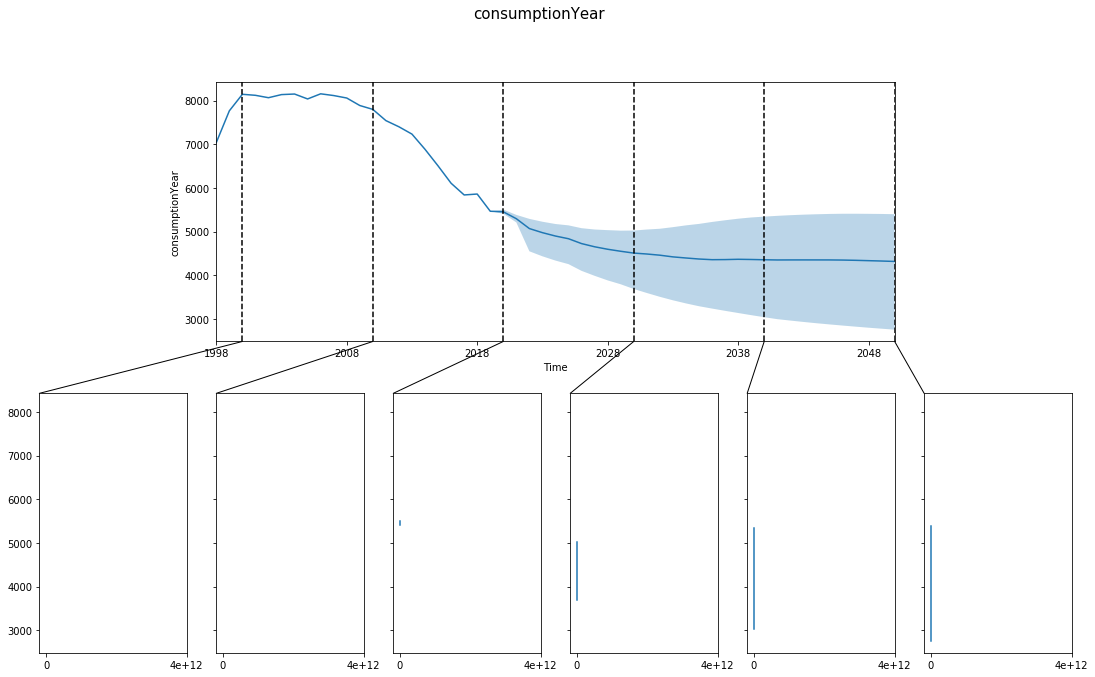

In [20]:
%matplotlib inline

from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 

#Create envelope plot

#l = 'semiScheduleGenSpotMarket'
# group_by='rooftopPV', density = Density.KDE, grouping_specifiers={'residential', 'business', 'both'}
# group_by='onsiteGeneration', density = Density.KDE, grouping_specifiers={'Central', 'Slow change', 'Fast change', 'Step change', 'High DER'}
#, group_by=l

for ooi in outcomes_to_show:
    fig, ax_env = multiple_densities(experiments, outcomesYear, outcomes_to_show = ooi,
                                     points_in_time=points_of_interest,
                                     density = Density.KDE, grouping_specifiers=None , titles={ooi}, ylabels={ooi: ooi},
                                     legend=True, fill=True, plot_type=PlotType.ENVELOPE)


    fig[0].suptitle("{}".format(ooi), fontsize=15)
    fig[0].set_size_inches(18.5, 10.5)
    ax_env[ooi]['main plot'].set_xticklabels(simulationYears[range(0,len(simulationYears),10)])

    plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')
    fig, ax_env = multiple_densities(experiments, outcomesYear, outcomes_to_show = ooi,
                                     points_in_time=points_of_interest,
                                     density = Density.HIST, grouping_specifiers=None , titles={ooi}, ylabels={ooi: ooi},
                                     legend=True, fill=False, plot_type=PlotType.ENV_LIN)
    
    
    fig[0].suptitle("{}".format(ooi), fontsize=15)
    fig[0].set_size_inches(18.5, 10.5)
    ax_env[ooi]['main plot'].set_xticklabels(simulationYears[range(0,len(simulationYears),5)])
    
    plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\outputs\\figs', '_envelope_line_density_%s'%(ooi)),
                dpi=300, bbox_inches='tight')
    
